In [25]:
import pandas as pd
import re

In [26]:
ss = pd.read_csv('Assignment 3 Sentiment Scores.csv')

In [27]:
ss.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [29]:
senti.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [28]:
senti = ss.copy()

In [30]:
for i in range(len(ss.columns)):
    for ii in range(i+1,len(ss.columns)):
            temp = ss.columns[i] +'_'+ss.columns[ii]
            senti[temp]=ss[ss.columns[i]]-ss[ss.columns[ii]]

In [31]:
import numpy as np

use = []
for q in senti.columns[10:]:
    #qq = sum(senti[q].dropna())/(len(senti[q]) - senti[q].count(None))
    p1,p2 = re.split('_',q)
    neg = (senti[q]<0)
    neg_sent  = senti[q][neg].sum()/senti[q][neg].count()
    pos = (senti[q]>0)
    pos_sent  = senti[q][pos].sum()/senti[q][pos].count()
    use.append((p1,p2,pos_sent,neg_sent))

In [32]:
import re
re.split('_',senti.columns[10])

['ES', 'LS']

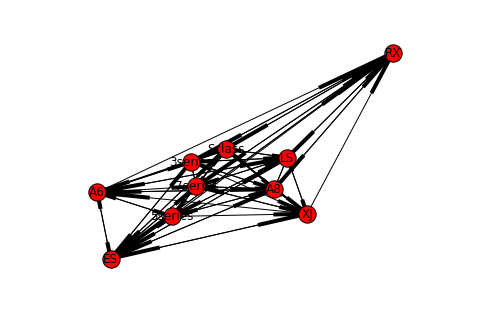

In [33]:
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

G = nx.DiGraph()

G.add_nodes_from(ss.columns)

for a,b,pos,neg in use:
    if pos!=0 :
        G.add_edge(b,a,{'weight':pos})
    if neg!=0:
        G.add_edge(a,b,{'weight':abs(neg)})
        
plt.figure()
nx.draw(G, with_labels=True)
plt.show()

In [34]:
pr = nx.pagerank(G, alpha=0.85,weight='weight')

In [35]:
pr_df = pd.DataFrame.from_dict(pr,orient='index')
pr_df = pr_df.reset_index()
pr_df.columns=['Model','pr']
cs = pd.read_csv('car_sales.csv')
cs = cs.merge(pr_df)

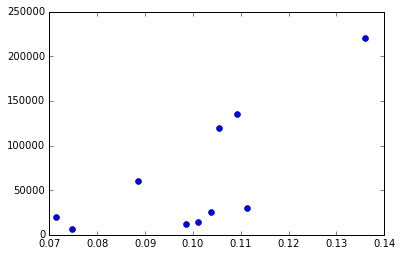

In [36]:
plt.plot(cs['pr'], cs['Sales'], marker='o', linestyle='')

In [37]:
u1 = pd.DataFrame.count(ss)


u1 = u1.to_frame()


In [38]:
u1 = u1.reset_index()

u1.columns = ['Model','sentcount']

u1

,Model,sentcount
0,ES,70
1,LS,319
2,RX,58
3,A8,167
4,A6,43
5,3series,29
6,5series,29
7,7series,101
8,XJ,37
9,Sclass,233


In [39]:
cs = cs.merge(u1)
cs = cs.merge(u2)

In [40]:
u2 = pd.DataFrame.sum(ss)

u2 = u2.to_frame()

u2 = u2.reset_index()

u2.columns = ['Model','sentscore']

u2

,Model,sentscore
0,ES,96.0
1,LS,398.0
2,RX,105.0
3,A8,206.0
4,A6,44.0
5,3series,34.0
6,5series,21.0
7,7series,104.0
8,XJ,56.0
9,Sclass,225.0


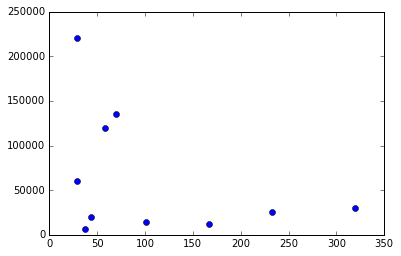

In [41]:
plt.plot(cs['sentcount'], cs['Sales'], marker='o', linestyle='')

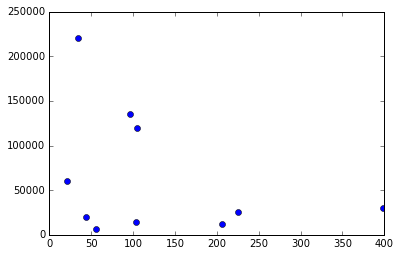

In [21]:
plt.plot(cs['sentscore'], cs['Sales'], marker='o', linestyle='')

In [42]:
with open('EmotionLookupTable.txt') as f:
    content = f.read().splitlines()

In [43]:
content[0].split('*')

['abandon', '\t-2\tliwc uness specified otherwise']

### Part C

In [44]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

post = pd.read_csv('Assignment 3 Edmunds Posts.csv')
models = ['ES','LS','RX','A8','A6','3series','5series','7series','XJ','Sclass']
models = [x.lower() for x in models]

In [45]:
from textblob import TextBlob

In [47]:
#for each reivew, take out punctuation and stop words, and lemmentize.
#if a model is in the review, sum up the sentiments of 5 words before and after the model. 
#The number is the sentiment of the model in the review.

total_score = []

for review in post['Posts']:
    score = []
    words_lem = []
    
    review = nltk.word_tokenize(review.lower())
    review_words = [word for word in review if word not in set(string.punctuation)]
    filtered_words_sw = [word for word in review_words if word not in stopwords.words('english')]
    filtered_poi = nltk.pos_tag(filtered_words_sw)
    wordnet_tag ={'NN':'n','JJ':'a','VB':'v','RB':'r'}
    for t in filtered_poi:
        try: words_lem.append(wnl.lemmatize(t[0],wordnet_tag[t[1][:2]]))
        except: words_lem.append(wnl.lemmatize(t[0]))
    
    for m in models:
        if m in words_lem:
            m_string = ' '.join(words_lem[words_lem.index(m)-5:words_lem.index(m)+5])
            senti = TextBlob(m_string).sentiment.polarity
        else:
            senti = 0
        score.append(senti)
    
    total_score.append(score)

In [48]:
score_df = pd.DataFrame(total_score)
score_df.columns=['ES','LS','RX','A8','A6','3series','5series','7series','XJ','Sclass']

#### After sentiment scores are generated for all the reviews and built into a table, it's fed into the same prcoess in part b to calculate page rank

In [61]:
score_diff = score_df.copy()
for i in range(len(score_df.columns)):
    for ii in range(i+1,len(score_df.columns)):
            temp = score_df.columns[i] +'_'+score_df.columns[ii]
            score_diff[temp]=score_df[score_df.columns[i]]-score_df[score_df.columns[ii]]

In [62]:
use_new = []
for q in score_diff.columns[10:]:
    #qq = sum(senti[q].dropna())/(len(senti[q]) - senti[q].count(None))
    p1,p2 = re.split('_',q)
    neg = (score_diff[q]<0)
    neg_sent  = score_diff[q][neg].sum()/score_diff[q][neg].count()
    pos = (score_diff[q]>0)
    pos_sent  = score_diff[q][pos].sum()/score_diff[q][pos].count()
    use_new.append((p1,p2,pos_sent,neg_sent))

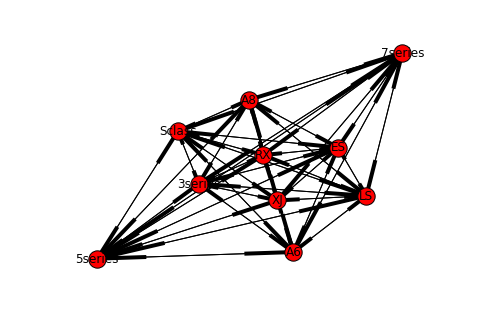

In [63]:
G = nx.DiGraph()

G.add_nodes_from(score_df.columns)

for a,b,pos,neg in use_new:
    if pos!=0 :
        G.add_edge(b,a,{'weight':pos})
    if neg!=0:
        G.add_edge(a,b,{'weight':abs(neg)})
        
plt.figure()
nx.draw(G, with_labels=True)
plt.show()

In [64]:
pr_new = nx.pagerank(G, alpha=1,weight='weight')
pr_new_df = pd.DataFrame.from_dict(pr_new,orient='index')
pr_new_df = pr_new_df.reset_index()
pr_new_df.columns=['Model','pr']
cs_new = pd.read_csv('car_sales.csv')
cs_new = cs_new.merge(pr_new_df)

In [65]:
import scipy
print cs_new.corr()
scipy.stats.spearmanr(cs_new['pr'],cs_new['Sales'])

          Sales        pr
Sales  1.000000  0.438021
pr     0.438021  1.000000


SpearmanrResult(correlation=0.39393939393939392, pvalue=0.25999776683488757)

#### The correlation between the sales and the auto-generated sentiment is 44%, much lower than the manual sentiment. There are a few potential improvement to make during the process:
1. Sometimes the reviewers mention Mercedes instead of S calss even though they refer to the same car. We could map the car brands to the models.
2. One model could be mentioned multiple times in a single review, we could take the average of the sentiments for all the mentions.
3. Textblob might not be the most accurate sentiment analyzer. We could use something more dynamic to score the sentiment.